# Time Analysis: *Wine Spectator*'s Top 100 Wines, 1988-2020
List available online on *Wine Spectator*'s [Top 100 Lists web site](https://top100.winespectator.com/lists/).

## File Setup

In [734]:
# import and initialize main python libraries
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import bar_chart_race as bcr
import seaborn as sns

# import libraries for file navigation
import os
import shutil
import glob
from pandas_ods_reader import read_ods

# import other packages
from scipy import stats
from sklearn import linear_model

# import geo packages
import geopandas as gpd
import descartes
from shapely.geometry import Point, Polygon

# import Geopy packages
import geopy
from geopy.geocoders import Nominatim

In [735]:
# initialize vizualization set
sns.set(style="whitegrid", palette="colorblind", color_codes=True)
sns.mpl.rc("figure", figsize=(10, 6))

# Jupyter Notebook
%matplotlib inline

## Dataframe Exploration

In [736]:
# Note: save CSV files in UTF-8 format to preserve special characters.
df_Wine = pd.read_csv('./Wine_Hier00.csv')
df_GeoCache = pd.read_csv('./GeoCache.csv')
df_Flag = pd.read_csv('./emoji_list.csv')

In [737]:
df_Wine.shape

(3301, 25)

In [738]:
df_Wine.dtypes

Review_Year           float64
Rank                   object
Vintage                object
Score                 float64
Price                  object
Winemaker              object
Wine                   object
Wine_Style             object
Grape_Blend            object
Blend_List             object
Geography              object
Cases_Made            float64
Cases_Imported        float64
Reviewer               object
Drink_now             float64
Best_Drink_from       float64
Best_Drink_Through    float64
Review                 object
Hierarchy              object
Address                object
loc                    object
point                  object
lat                   float64
long                  float64
altitude              float64
dtype: object

In [739]:
# CSV of wines is retaining a blank row at the end of the dataset. Remove the last row to prevent data type errors.

# number of rows to drop
n = 1

df_Wine.drop(df_Wine.tail(n).index, inplace = True)

In [740]:
# Review_Year
# Convert Review_Year from float to int
df_Wine['Review_Year'] = df_Wine['Review_Year'].astype(int)

In [741]:
df_GeoCache.shape

(1224, 8)

In [742]:
df_Flag.shape

(19, 3)

In [743]:
df_Wine.sample(10)

,Review_Year,Rank,Vintage,Score,Price,Winemaker,Wine,Wine_Style,Grape_Blend,Blend_List,...,Best_Drink_from,Best_Drink_Through,Review,Hierarchy,Address,loc,point,lat,long,altitude
358,2017,59,2015,90.0,24,Bodegas Emilio Moro,Tempranillo Ribera del Duero,Red,Tempranillo,NaN,...,2017.0,2023.0,"Black cherry, red plum and currant flavors are...",Hierarchy_00,Spain,España,"(39.3260685, -4.8379791, 0.0)",39.326068,-4.837979,0.0
2570,1995,71,1991,92.0,28,Rosemount,Chardonnay Hunter Valley Roxburgh,White,Chardonnay,NaN,...,1995.0,NaN,"Deep, rich, complex and mouth-filling. This oo...",Hierarchy_00,Australia,Australia,"(-24.7761086, 134.755, 0.0)",-24.776109,134.755000,0.0
3017,1990,18,1986,95.0,30,Dunn,Cabernet Sauvignon Howell Mountain,Red,Cabernet Sauvignon,NaN,...,2000.0,NaN,"Dense in color and aroma, this wine has a bold...",Hierarchy_00,USA,United States,"(39.7837304, -100.4458825, 0.0)",39.783730,-100.445882,0.0
1408,2006,9,2004,96.0,70,Brancaia,Toscana Il Blu,Red,Blend,"Sangiovese, Merlot and Cabernet Sauvignon",...,2008.0,NaN,"The aromas leave me speechless, with freshly c...",Hierarchy_00,Italy,Italia,"(42.6384261, 12.674297, 0.0)",42.638426,12.674297,0.0
2856,1992,57,1990,92.0,30,Robert Mondavi,Pinot Noir Napa Valley Reserve,Red,Pinot Noir,NaN,...,1992.0,NaN,"Powerful and complete, with depth, complexity ...",Hierarchy_00,USA,United States,"(39.7837304, -100.4458825, 0.0)",39.783730,-100.445882,0.0
474,2016,75,2014,91.0,20,Bodegas Godeval,Valdeorras Viña Godeval Cepas Vellas,White,Godello,NaN,...,2016.0,NaN,"Pear, peach and quince flavors mingle in this ...",Hierarchy_00,Spain,España,"(39.3260685, -4.8379791, 0.0)",39.326068,-4.837979,0.0
1801,2002,2,1999,95.0,70,Chateau St. Jean,Cabernet Sauvignon Sonoma County Cinq Cépages,Red,Cabernet Sauvignon,NaN,...,2002.0,2014.0,"Gorgeous Cabernet, offering a mix of ripe, ric...",Hierarchy_00,USA,United States,"(39.7837304, -100.4458825, 0.0)",39.783730,-100.445882,0.0
1243,2008,44,2007,91.0,12,Leasingham,Riesling Clare Valley Magnus,White,Riesling,NaN,...,2008.0,2015.0,Impressive for its harmony and seamless struct...,Hierarchy_00,Australia,Australia,"(-24.7761086, 134.755, 0.0)",-24.776109,134.755000,0.0
2633,1994,34,1992,92.0,14,Robert Mondavi,Zinfandel Napa Valley,Red,Zinfandel,NaN,...,1994.0,NaN,"Ripe, rich and supple, with plush cherry, rasp...",Hierarchy_00,USA,United States,"(39.7837304, -100.4458825, 0.0)",39.783730,-100.445882,0.0
2660,1994,61,1991,91.0,18,Bodegas Alejandro Fernandez,Ribera del Duero Pesquera Crianza,Red,Tempranillo,NaN,...,1994.0,2000.0,"A big, rich, tannic, deeply colored red that's...",Hierarchy_00,Spain,España,"(39.3260685, -4.8379791, 0.0)",39.326068,-4.837979,0.0


## Review Year versus Vintage Year, for non-NV wines

In [744]:
# Remove Non-Vintage (NV) wines from df_Wine

df_Wine_V = df_Wine[
    (df_Wine.Vintage != 'NV')
]

df_Wine_V.shape

(3245, 25)

In [745]:
# Calculate difference between Review Year and Vintage Year
df_Wine_V['Review_vs_Vintage'] = df_Wine_V['Review_Year'].astype(float) - df_Wine_V['Vintage'].astype(float)

/home/elizabethwotawa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [746]:
df_Wine_V.sample(10)

,Review_Year,Rank,Vintage,Score,Price,Winemaker,Wine,Wine_Style,Grape_Blend,Blend_List,...,Best_Drink_Through,Review,Hierarchy,Address,loc,point,lat,long,altitude,Review_vs_Vintage
1822,2002,23,2000,94.0,45,Capezzana,Toscana Ghiaie della Furba,Red,Blend,"Cabernet Sauvignon, Merlot and Syrah",...,NaN,"Fantastic. Very ripe and rich, with raisin and...",Hierarchy_00,Italy,Italia,"(42.6384261, 12.674297, 0.0)",42.638426,12.674297,0.0,2.0
2759,1993,60,1990,92.0,34,Domaine Roulot,Meursault Les Tessons Clos de Mon Plaisir,White,Chardonnay,NaN,...,NaN,"A blockbuster, with vanilla, honey, butterscot...",Hierarchy_00,France,France,"(46.603354, 1.8883335, 0.0)",46.603354,1.888333,0.0,3.0
2940,1991,41,1987,94.0,36,Dunn,Cabernet Sauvignon Howell Mountain,Red,Cabernet Sauvignon,NaN,...,NaN,Offers a massive concentration of rich currant...,Hierarchy_00,USA,United States,"(39.7837304, -100.4458825, 0.0)",39.783730,-100.445882,0.0,4.0
2000,2000,1,1997,98.0,115,Antinori,Toscana Solaia,Red,Blend,Cabernet – Sangiovese,...,NaN,"Dark ruby in color, with extremely ripe raisin...",Hierarchy_00,Italy,Italia,"(42.6384261, 12.674297, 0.0)",42.638426,12.674297,0.0,3.0
2993,1991,94,1988,90.0,12,Rocche Costamagna,Barbera d'Alba,Red,Barbera,NaN,...,1993.0,Beautifully articulated raspberry and cherry a...,Hierarchy_00,Italy,Italia,"(42.6384261, 12.674297, 0.0)",42.638426,12.674297,0.0,3.0
1255,2008,56,2007,90.0,15,St.-Urbans-Hof,Riesling QbA Mosel,White,Riesling,NaN,...,2018.0,"Needs a little air to reveal its floral, apric...",Hierarchy_00,Germany,Deutschland,"(51.0834196, 10.4234469, 0.0)",51.083420,10.423447,0.0,1.0
1478,2006,79,2004,93.0,17,Johannishof,Riesling Kabinett Rheingau Johannisberg V,White,Riesling,NaN,...,2018.0,"Everything comes together here--the site, the ...",Hierarchy_00,Germany,Deutschland,"(51.0834196, 10.4234469, 0.0)",51.083420,10.423447,0.0,2.0
257,2018,58,2015,92.0,27,Vasse Felix,Cabernet Sauvignon Margaret River Filius,Red,Cabernet Sauvignon,NaN,...,2028.0,Opens with a fresh green accent reminiscent of...,Hierarchy_00,Australia,Australia,"(-24.7761086, 134.755, 0.0)",-24.776109,134.755000,0.0,3.0
89,2020,90,2018,96.0,110,Schäfer-Fröhlich,Riesling Nahe Felseneck GG,White,Riesling,NaN,...,2036.0,"A very expressive, medium-bodied version, with...",Hierarchy_00,Germany,Deutschland,"(51.0834196, 10.4234469, 0.0)",51.083420,10.423447,0.0,2.0
654,2014,55,2011,90.0,12,Veramonte,Cabernet Sauvignon Colchagua Valley El Caballero,Red,Cabernet Sauvignon,NaN,...,2018.0,"Firm and well-focused, with zesty red plum and...",Hierarchy_00,Chile,Chile,"(-31.7613365, -71.3187697, 0.0)",-31.761336,-71.318770,0.0,3.0


In [747]:
# Average difference between Review and Vintage (years) by Wine Style - All Years
df_RV_All = pd.DataFrame({'Review_vs_Vintage' : df_Wine_V.groupby(['Wine_Style'])['Review_vs_Vintage'].mean()}).reset_index()
df_RV_All

,Wine_Style,Review_vs_Vintage
0,Dessert & Fortified,3.628571
1,Red,3.057617
2,Rosé | Rosado,1.000000
3,Sparkling,6.913043
4,White,2.000000


In [748]:
# Average difference between Review and Vintage (years) by Wine Style - By Year
df_RV_ByYear = pd.DataFrame({'Review_vs_Vintage' : df_Wine_V.groupby(['Review_Year', 'Wine_Style'])['Review_vs_Vintage'].mean()}).reset_index()
df_RV_ByYear.sample(10)

,Review_Year,Wine_Style,Review_vs_Vintage
65,2006,Red,2.701299
45,2000,Sparkling,10.000000
3,1988,White,1.777778
120,2019,Rosé | Rosado,1.000000
113,2018,Dessert & Fortified,2.333333
47,2001,Dessert & Fortified,7.000000
38,1998,Sparkling,8.000000
11,1991,Dessert & Fortified,2.500000
52,2002,White,1.800000
20,1993,White,2.285714


### Visualization

In [749]:
# set palette and dimensions
palette = sns.color_palette('colorblind')

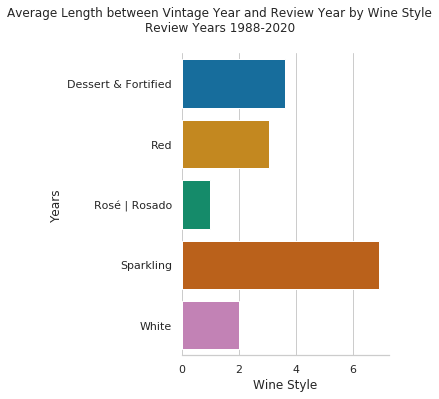

In [750]:
# bar plot of summary data

g = sns.catplot(
    data = df_RV_All,
    kind = 'bar',
    y = 'Wine_Style',
    x = 'Review_vs_Vintage',
)

g.despine(left = True)
g.set_axis_labels('Wine Style', 'Years')

plt.suptitle('Average Length between Vintage Year and Review Year by Wine Style\nReview Years 1988-2020', y = 1.1)
plt.savefig('./images/avg_yrs_vintage_to_review.png')

In [751]:
# explore the sparkling wines further.

# subset the dataset to only sparkling wines

df_Wine_Sparkling = df_Wine_V[
    (df_Wine.Wine_Style == 'Sparkling')
]

# Average difference between Review and Vintage (years) by Wine Style - By Year
df_Sparkling = pd.DataFrame({'Review_vs_Vintage' : df_Wine_Sparkling.groupby(['Address'])['Review_vs_Vintage'].mean()}).reset_index()
df_Sparkling.head()

/home/elizabethwotawa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,Address,Review_vs_Vintage
0,France,7.958333
1,Italy,2.000000
2,Spain,4.000000
3,USA,6.277778


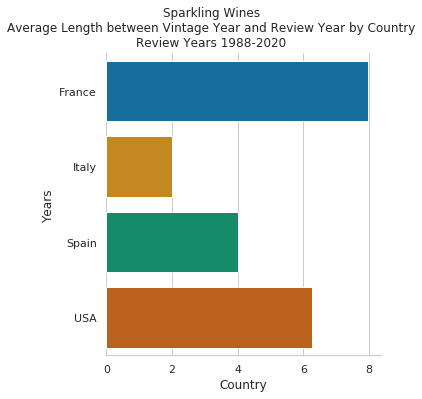

In [752]:
# bar plot of summary data

g = sns.catplot(
    data = df_Sparkling,
    kind = 'bar',
    y = 'Address',
    x = 'Review_vs_Vintage',
)

g.despine(left = True)
g.set_axis_labels('Country', 'Years')

plt.suptitle('Sparkling Wines\nAverage Length between Vintage Year and Review Year by Country\nReview Years 1988-2020', y = 1.1)
plt.savefig('./images/avg_yrs_vintage_to_review_sparkling.png')

## Wait to Drink? Drink from Year versus Review Year

In [753]:
# Filter df_Wine where Vintage is not NV
df_Wine_BDF = df_Wine_V[
    (df_Wine['Best_Drink_from'].isnull() == False )
]

df_Wine_BDF.shape

/home/elizabethwotawa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


(2947, 26)

In [754]:
# Calculate difference between Best Drink From and Review Year
df_Wine_BDF['DrinkFrom_vs_Review'] = df_Wine_BDF['Best_Drink_from'].astype(float) - df_Wine_BDF['Review_Year'].astype(float)

/home/elizabethwotawa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [755]:
df_Wine_BDF.head()

,Review_Year,Rank,Vintage,Score,Price,Winemaker,Wine,Wine_Style,Grape_Blend,Blend_List,...,Review,Hierarchy,Address,loc,point,lat,long,altitude,Review_vs_Vintage,DrinkFrom_vs_Review
0,2020,1,2010,96.0,139,Bodegas Marqués de Murrieta,Rioja Castillo Ygay Gran Reserva Especial,Red,Blend,Tempranillo and Mazuelo.,...,"Maturing well, this round red is a lovely exam...",Hierarchy_00,Spain,España,"(39.3260685, -4.8379791, 0.0)",39.326068,-4.837979,0.0,10.0,0.0
1,2020,2,2018,95.0,85,Aubert,Pinot Noir Sonoma Coast UV Vineyard,Red,Pinot Noir,NaN,...,"Powerful and structured, with minerally richne...",Hierarchy_00,USA,United States,"(39.7837304, -100.4458825, 0.0)",39.783730,-100.445882,0.0,2.0,1.0
2,2020,3,2015,97.0,90,San Filippo,Brunello di Montalcino Le Lucére,Red,Brunello di Montalcino,NaN,...,"Effusive aromas of black currant, blueberry, v...",Hierarchy_00,Italy,Italia,"(42.6384261, 12.674297, 0.0)",42.638426,12.674297,0.0,5.0,3.0
3,2020,4,2016,96.0,135,Mayacamas,Cabernet Sauvignon Mount Veeder,Red,Cabernet Sauvignon,NaN,...,This distinctive red throws a lot of wild sage...,Hierarchy_00,USA,United States,"(39.7837304, -100.4458825, 0.0)",39.783730,-100.445882,0.0,4.0,2.0
4,2020,5,2016,96.0,90,Domaine de la Vieille Julienne,Châteauneuf-du-Pape Les Trois Sources,Red,Châteauneuf-du-Pape,NaN,...,"A lush, ripe style, with açaí berry, blueberry...",Hierarchy_00,France,France,"(46.603354, 1.8883335, 0.0)",46.603354,1.888333,0.0,4.0,2.0


In [756]:
df_Wine_BDFSummStyle = df_Wine_BDF[['Review_vs_Vintage','DrinkFrom_vs_Review','Wine_Style']].groupby('Wine_Style').mean()
df_Wine_BDFSummStyle['Total'] = df_Wine_BDFSummStyle['Review_vs_Vintage'] + df_Wine_BDFSummStyle['DrinkFrom_vs_Review']
df_Wine_BDFSummStyle

,Review_vs_Vintage,DrinkFrom_vs_Review,Total
Wine_Style,,,
Dessert & Fortified,3.600000,5.538462,9.138462
Red,3.025822,1.579343,4.605164
Rosé | Rosado,1.000000,0.000000,1.000000
Sparkling,7.441176,0.352941,7.794118
White,1.970381,0.296192,2.266573


In [757]:
# Determine index type of dataframe
df_Wine_BDFSummCountry = df_Wine_BDF[['Review_vs_Vintage','DrinkFrom_vs_Review','Address','Wine_Style']].groupby(['Wine_Style','Address']).mean()
df_Wine_BDFSummCountry.index

MultiIndex(levels=[['Dessert & Fortified', 'Red', 'Rosé | Rosado', 'Sparkling', 'White'], ['Argentina', 'Australia', 'Austria', 'Canada', 'Chile', 'France', 'Germany', 'Greece', 'Hungary', 'Israel', 'Italy', 'New Zealand', 'Portugal', 'South Africa', 'Spain', 'USA', 'Uruguay']],
           codes=[[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], [3, 5, 8, 12, 13, 15, 0, 1, 2, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 5, 15, 5, 10, 14, 15, 0, 1, 2, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15]],
           names=['Wine_Style', 'Address'])

In [758]:
# reset the index of the dataframe
df_Wine_BDFSummCountry = df_Wine_BDFSummCountry.reset_index()
# df_Wine_BDFSummCountry['Total'] = df_Wine_BDFSummCountry['Review_vs_Vintage'] + df_Wine_BDFSummCountry['DrinkFrom_vs_Review']
# df_Wine_BDFSummCountry['Axis'] = df_Wine_BDFSummCountry['Wine_Style'] + ' - ' + df_Wine_BDFSummCountry['Address']
df_Wine_BDFSummCountry

,Wine_Style,Address,Review_vs_Vintage,DrinkFrom_vs_Review
0,Dessert & Fortified,Canada,2.000000,0.000000
1,Dessert & Fortified,France,3.400000,2.750000
2,Dessert & Fortified,Hungary,4.875000,0.000000
3,Dessert & Fortified,Portugal,3.382353,8.882353
4,Dessert & Fortified,South Africa,6.000000,1.000000
5,Dessert & Fortified,USA,4.000000,2.000000
6,Red,Argentina,2.290909,0.290909
7,Red,Australia,2.618056,1.055556
8,Red,Austria,3.000000,0.000000
9,Red,Chile,2.945455,0.200000


In [759]:
# write a function to graph several stacked bar plots

def barh_plot(wine_style, left, right, maxyear, label):
    df = df_Wine_BDFSummCountry[
        (df_Wine_BDFSummCountry['Wine_Style'] == wine_style )
    ]
    
    A = np.array(df['Wine_Style'])
    N = len(A)
    
    dim = (10, 8)
    fig, ax = plt.subplots(figsize = dim)

    # x locations for the groups
    ind = np.arange(N)

    width = 0.35

    # Plot the totals
    p1 = plt.barh(ind, df[left], width)
    p2 = plt.barh(ind, df[right], width, left = df[left])

    plt.xlabel('Average Years')
    plt.xticks(np.arange(0, maxyear, 2))

    plt.yticks(ind, df[label])
    
    plt.title(wine_style + '\nAverage Time from Vintage Year to Review Year, from Review Year to Best to Drink Year\nReview Years 1988-2020')
    
    plt.legend((p1[0], p2[0]), ('Vintage to Review', 'Review to Best to Drink'))
    
    fig.savefig('./images/vintage_vs_review_vs_besttodrink_' + wine_style + '.png')


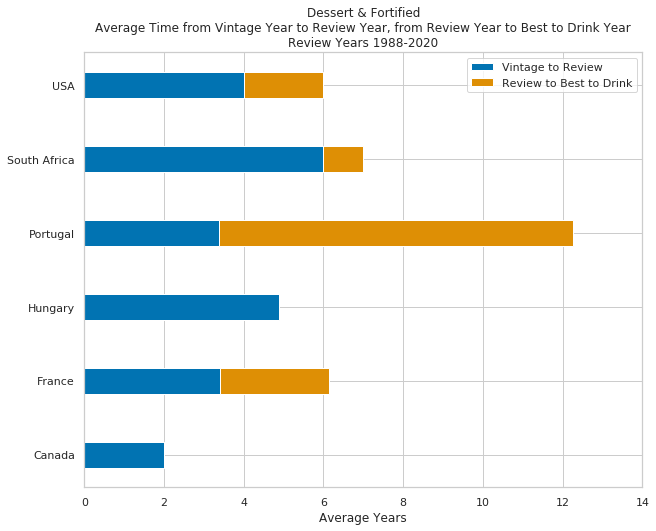

In [760]:
barh_plot(wine_style = 'Dessert & Fortified',
          left = 'Review_vs_Vintage', 
          right = 'DrinkFrom_vs_Review', 
          maxyear = 15, 
          label = 'Address')

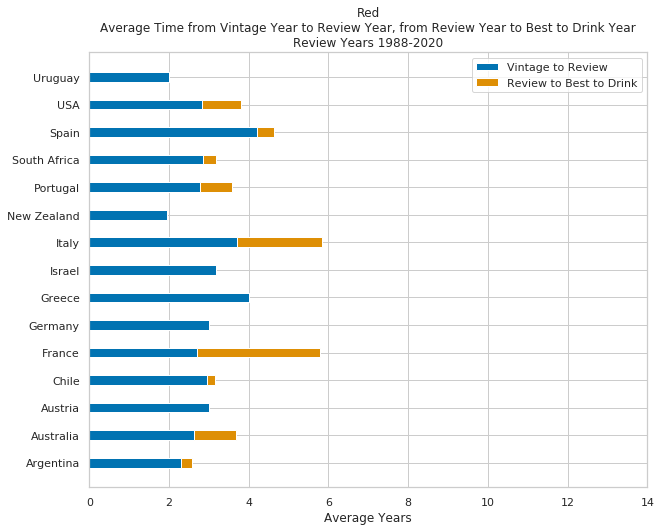

In [761]:
barh_plot(wine_style = 'Red',
          left = 'Review_vs_Vintage', 
          right = 'DrinkFrom_vs_Review', 
          maxyear = 15, 
          label = 'Address')

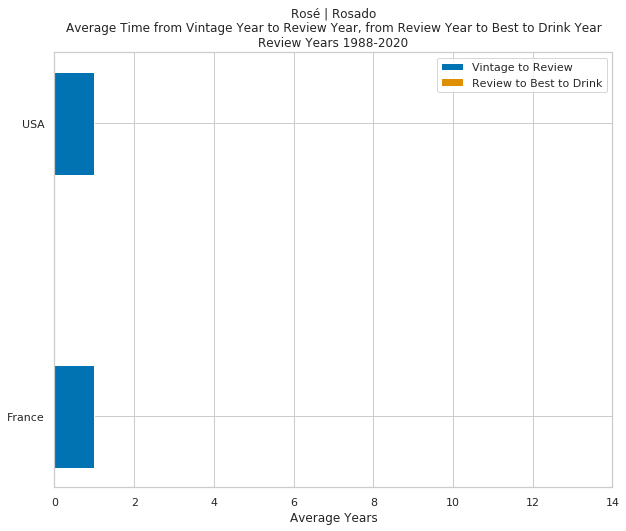

In [762]:
barh_plot(wine_style = 'Rosé | Rosado',
          left = 'Review_vs_Vintage', 
          right = 'DrinkFrom_vs_Review', 
          maxyear = 15, 
          label = 'Address')

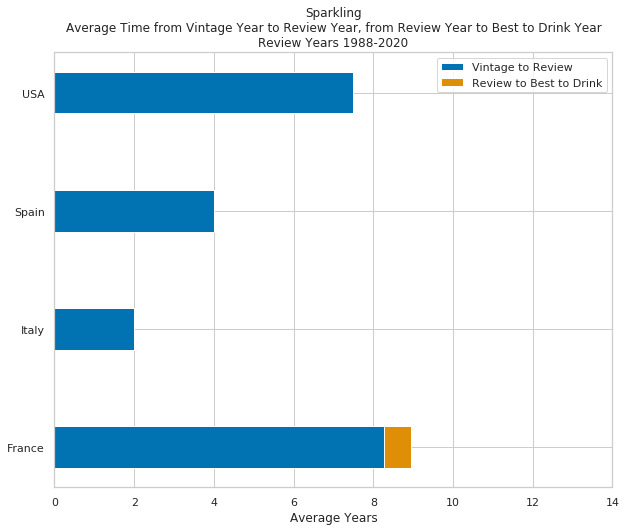

In [763]:
barh_plot(wine_style = 'Sparkling',
          left = 'Review_vs_Vintage', 
          right = 'DrinkFrom_vs_Review', 
          maxyear = 15, 
          label = 'Address')

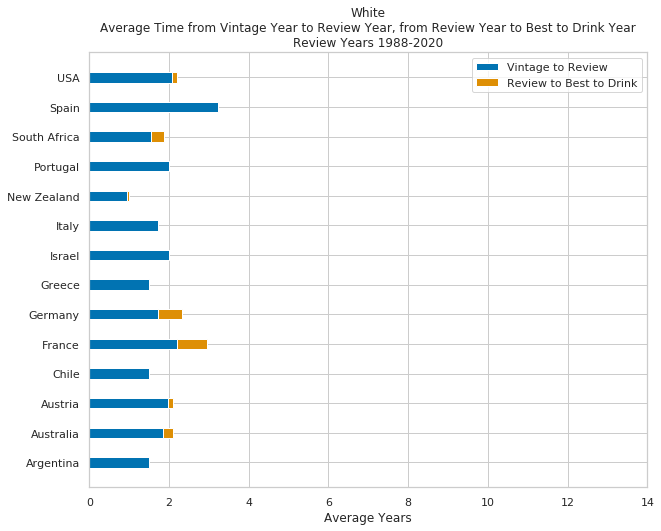

In [764]:
barh_plot(wine_style = 'White',
          left = 'Review_vs_Vintage', 
          right = 'DrinkFrom_vs_Review', 
          maxyear = 15, 
          label = 'Address')

## Drink Until? Drink from Year versus Review Year versus Drink Through Year

In [765]:
# Filter df_Wine where Vintage is not NV
df_Wine_BDT = df_Wine_BDF[
    (df_Wine_BDF['Best_Drink_Through'].isnull() == False )
]

df_Wine_BDT.shape

(2142, 27)

In [766]:
# Calculate difference between Best Drink From and Review Year
df_Wine_BDT['DrinkThru_vs_DrinkFrom'] = df_Wine_BDT['Best_Drink_Through'].astype(float) - df_Wine_BDT['Best_Drink_from'].astype(float)

/home/elizabethwotawa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [767]:
df_Wine_BDT.head()

,Review_Year,Rank,Vintage,Score,Price,Winemaker,Wine,Wine_Style,Grape_Blend,Blend_List,...,Hierarchy,Address,loc,point,lat,long,altitude,Review_vs_Vintage,DrinkFrom_vs_Review,DrinkThru_vs_DrinkFrom
0,2020,1,2010,96.0,139,Bodegas Marqués de Murrieta,Rioja Castillo Ygay Gran Reserva Especial,Red,Blend,Tempranillo and Mazuelo.,...,Hierarchy_00,Spain,España,"(39.3260685, -4.8379791, 0.0)",39.326068,-4.837979,0.0,10.0,0.0,10.0
1,2020,2,2018,95.0,85,Aubert,Pinot Noir Sonoma Coast UV Vineyard,Red,Pinot Noir,NaN,...,Hierarchy_00,USA,United States,"(39.7837304, -100.4458825, 0.0)",39.783730,-100.445882,0.0,2.0,1.0,5.0
2,2020,3,2015,97.0,90,San Filippo,Brunello di Montalcino Le Lucére,Red,Brunello di Montalcino,NaN,...,Hierarchy_00,Italy,Italia,"(42.6384261, 12.674297, 0.0)",42.638426,12.674297,0.0,5.0,3.0,20.0
3,2020,4,2016,96.0,135,Mayacamas,Cabernet Sauvignon Mount Veeder,Red,Cabernet Sauvignon,NaN,...,Hierarchy_00,USA,United States,"(39.7837304, -100.4458825, 0.0)",39.783730,-100.445882,0.0,4.0,2.0,18.0
4,2020,5,2016,96.0,90,Domaine de la Vieille Julienne,Châteauneuf-du-Pape Les Trois Sources,Red,Châteauneuf-du-Pape,NaN,...,Hierarchy_00,France,France,"(46.603354, 1.8883335, 0.0)",46.603354,1.888333,0.0,4.0,2.0,18.0


In [768]:
# Determine index type of dataframe
df_Wine_BDTSummCountry = df_Wine_BDT[['Review_vs_Vintage','DrinkFrom_vs_Review','DrinkThru_vs_DrinkFrom','Address','Wine_Style']].groupby(['Wine_Style','Address']).mean()
df_Wine_BDTSummCountry.index

MultiIndex(levels=[['Dessert & Fortified', 'Red', 'Rosé | Rosado', 'Sparkling', 'White'], ['Argentina', 'Australia', 'Austria', 'Canada', 'Chile', 'France', 'Germany', 'Greece', 'Hungary', 'Israel', 'Italy', 'New Zealand', 'Portugal', 'South Africa', 'Spain', 'USA', 'Uruguay']],
           codes=[[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], [3, 5, 8, 12, 13, 0, 1, 2, 4, 5, 6, 9, 10, 11, 12, 13, 14, 15, 16, 5, 5, 10, 14, 15, 0, 1, 2, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15]],
           names=['Wine_Style', 'Address'])

In [769]:
# reset the index of the dataframe
df_Wine_BDTSummCountry = df_Wine_BDTSummCountry.reset_index()
df_Wine_BDTSummCountry['Total'] = df_Wine_BDTSummCountry['Review_vs_Vintage'] + df_Wine_BDTSummCountry['DrinkFrom_vs_Review'] + df_Wine_BDTSummCountry['DrinkThru_vs_DrinkFrom']
df_Wine_BDTSummCountry

,Wine_Style,Address,Review_vs_Vintage,DrinkFrom_vs_Review,DrinkThru_vs_DrinkFrom,Total
0,Dessert & Fortified,Canada,2.000000,0.000000,12.000000,14.000000
1,Dessert & Fortified,France,3.000000,1.454545,20.636364,25.090909
2,Dessert & Fortified,Hungary,4.875000,0.000000,12.375000,17.250000
3,Dessert & Fortified,Portugal,3.833333,9.333333,18.750000,31.916667
4,Dessert & Fortified,South Africa,6.000000,1.000000,14.000000,21.000000
5,Red,Argentina,2.307692,0.192308,4.384615,6.884615
6,Red,Australia,2.466667,0.791667,8.591667,11.850000
7,Red,Austria,3.000000,0.000000,6.000000,9.000000
8,Red,Chile,2.981132,0.207547,4.622642,7.811321
9,Red,France,2.586885,2.016393,10.072131,14.675410


In [770]:
# write a function to graph several stacked bar plots

def barh_plot_3(wine_style, left, mid, right, maxyear, label):
    df = df_Wine_BDTSummCountry[
        (df_Wine_BDTSummCountry['Wine_Style'] == wine_style )
    ]
    
    A = np.array(df['Wine_Style'])
    N = len(A)
    
    dim = (10, 8)
    fig, ax = plt.subplots(figsize = dim)

    # x locations for the groups
    ind = np.arange(N)

    width = 0.35

    # Plot the totals
    p1 = plt.barh(ind, df[left], width)
    p2 = plt.barh(ind, df[mid], width, left = df[left])
    p3 = plt.barh(ind, df[right], width, left = df[left] + df[mid])

    plt.xlabel('Average Years')
    plt.xticks(np.arange(0, maxyear, 2))

    plt.yticks(ind, df[label])
    
    plt.title(wine_style + '\nAverage Time from Vintage Year to Review Year to Best to Drink Year to Drink Through Year\nReview Years 1988-2020')
    
    plt.legend((p1[0], p2[0], p3[0]), ('Vintage to Review', 'Review to Best to Drink', 'Best to Drink to Drink Through'))
    
    fig.savefig('./images/vintage_vs_review_vs_besttodrink_vs_drinkthru_' + wine_style + '.png')


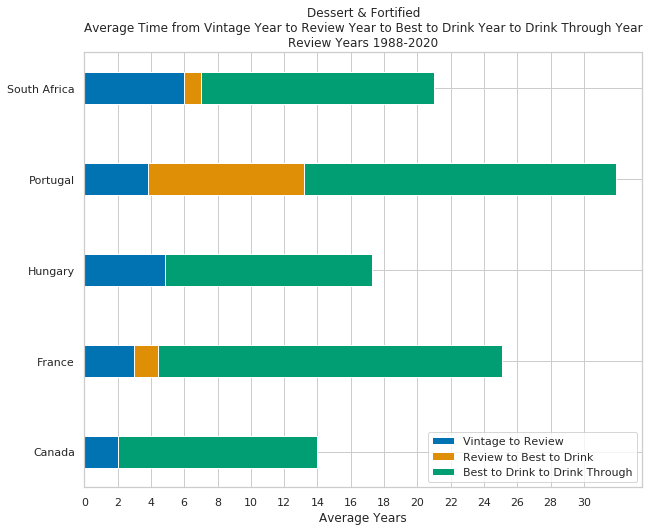

In [771]:
barh_plot_3(wine_style = 'Dessert & Fortified',
          left = 'Review_vs_Vintage', 
          mid = 'DrinkFrom_vs_Review',
          right = 'DrinkThru_vs_DrinkFrom', 
          maxyear = 32, 
          label = 'Address')

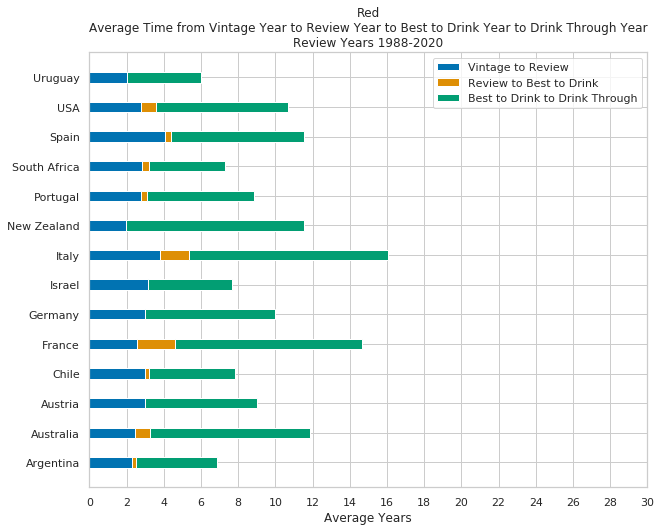

In [772]:
barh_plot_3(wine_style = 'Red',
          left = 'Review_vs_Vintage', 
          mid = 'DrinkFrom_vs_Review',
          right = 'DrinkThru_vs_DrinkFrom', 
          maxyear = 32, 
          label = 'Address')

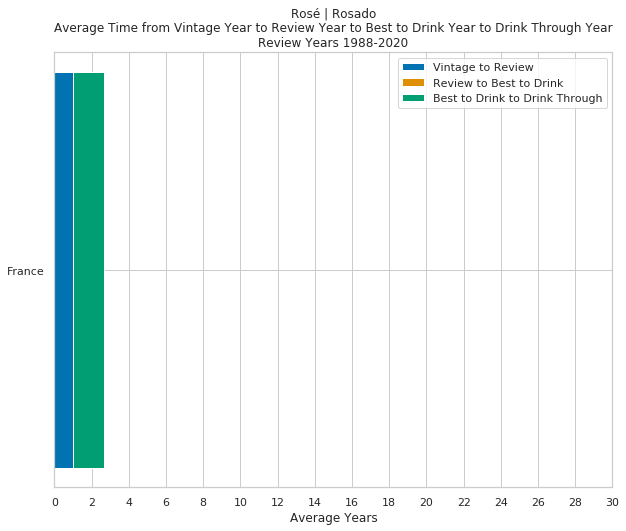

In [773]:
barh_plot_3(wine_style = 'Rosé | Rosado',
          left = 'Review_vs_Vintage', 
          mid = 'DrinkFrom_vs_Review',
          right = 'DrinkThru_vs_DrinkFrom', 
          maxyear = 32, 
          label = 'Address')

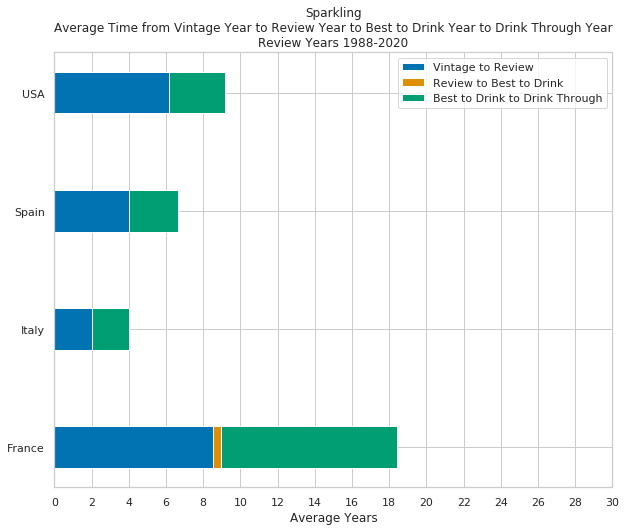

In [774]:
barh_plot_3(wine_style = 'Sparkling',
          left = 'Review_vs_Vintage', 
          mid = 'DrinkFrom_vs_Review',
          right = 'DrinkThru_vs_DrinkFrom', 
          maxyear = 32, 
          label = 'Address')

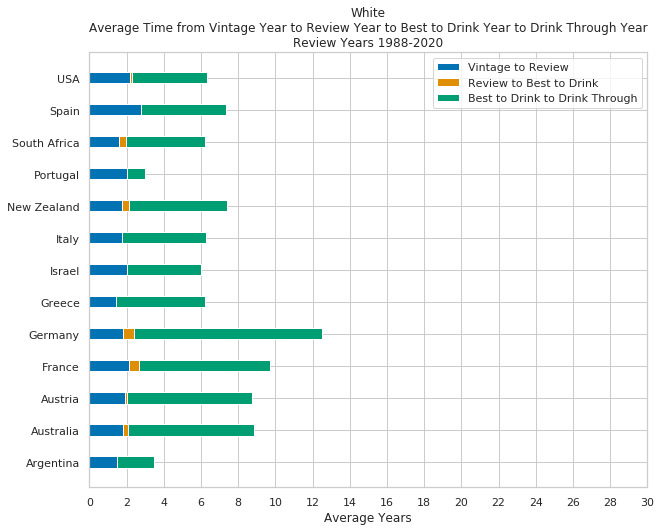

In [775]:
barh_plot_3(wine_style = 'White',
          left = 'Review_vs_Vintage', 
          mid = 'DrinkFrom_vs_Review',
          right = 'DrinkThru_vs_DrinkFrom', 
          maxyear = 32, 
          label = 'Address')